# Classificação de roupas


# Etapa 1: Importação das bibliotecas

In [4]:
#%tensorflow_version 2.x   # para google colab
from tensorflow.keras import layers, models
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
tf.__version__

'2.11.0'

# Etapa 2: Carregamento da base de dados

In [5]:
# para google colab
#from google.colab import drive
#drive.mount('/content/drive')

In [6]:
fashion_train_df = pd.read_csv('fashion-mnist-train.csv', sep = ',')
fashion_test_df = pd.read_csv('fashion-mnist-test.csv', sep = ',')

# Etapa 3: Visualização dos dados

0 => T-shirt/top
1 => Trouser
2 => Pullover
3 => Dress
4 => Coat
5 => Sandal
6 => Shirt
7 => Sneaker
8 => Bag
9 => Ankle boot


0 => Camiseta / top
1 => Calça
2 => Pulôver
3 => Vestido
4 => Brasão
5 => Sandália
6 => Camisa
7 => Tênis
8 => Bolsa
9 => Botins

In [7]:
fashion_train_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6,0,0,0,0,0,0,0,5,0,...,0.0,0.0,0.0,30.0,43.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,1,2,0,0,0,0,...,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6151,5,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6152,7,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6153,7,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6154,1,0,0,0,0,0,0,0,0,0,...,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
fashion_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6156 entries, 0 to 6155
Columns: 785 entries, label to pixel784
dtypes: float64(437), int64(348)
memory usage: 36.9 MB


In [9]:
fashion_train_df.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    1
pixel781    1
pixel782    1
pixel783    1
pixel784    1
Length: 785, dtype: int64

In [10]:
fashion_train_df.label.value_counts()

0    642
7    635
6    629
3    627
1    617
5    613
4    603
2    600
9    600
8    590
Name: label, dtype: int64

In [11]:
picture = fashion_train_df.iloc[0,1:]
picture = np.array(picture)
print(picture)
picture = picture.reshape(28,28,1)
picture.shape

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   4.   0.   0.   0.   0.   0.  62.  61.  21.  29.
  23.  51. 136.  61.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.  88. 201. 228. 225. 255. 115.  62.
 137. 255. 235. 222. 255. 135.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.  47. 252. 234. 238. 224. 215. 215. 229. 108.
 180. 207. 214. 224. 231. 249. 254.  45.   0.   0.   0.   0.   0.   0.
   0.   0.   1.   0.   0. 214. 222. 210. 213. 224. 225. 217. 220. 254.
 233. 219. 221. 217. 223. 221. 240. 254.   0.   0.   1.   0.   0.   0.
   1. 

(28, 28, 1)

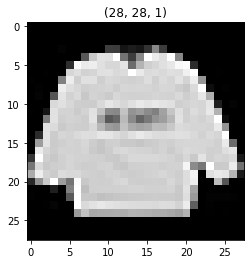

In [12]:
plt.imshow(picture,cmap='gray')
plt.title(picture.shape)
plt.show();

# Etapa 4: Tratamento da base de dados

In [13]:
df_sem_nan = fashion_train_df.dropna()
df_sem_nan

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6,0,0,0,0,0,0,0,5,0,...,0.0,0.0,0.0,30.0,43.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,1,2,0,0,0,0,...,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6150,7,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6151,5,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6152,7,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6153,7,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Etapa 5: Construção e treinamento do modelo

In [14]:
X = df_sem_nan.drop("label",axis=1)
y = df_sem_nan['label']
print(X.shape, y.shape)

(6155, 784) (6155,)


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
X_train = X_train / 255.
X_test = X_test / 255.

In [17]:
X_train = X_train.values.reshape(X_train.shape[0], *(28,28,1))
X_test = X_test.values.reshape(X_test.shape[0], *(28,28,1))

In [18]:
import tensorflow as tf

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(50, 3, activation="relu", input_shape = (28,28,1)),
    tf.keras.layers.MaxPool2D(3,3),
    tf.keras.layers.Conv2D(25,3),
    tf.keras.layers.MaxPool2D(3,3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [19]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 50)        500       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 8, 50)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 25)          11275     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 2, 2, 25)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 10)                1

In [20]:
model_1.compile(loss='sparse_categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [21]:
history_1 = model_1.fit(X_train,y_train,
                        epochs = 20,
                        validation_data=(X_test,y_test))

Epoch 1/20
154/154 [==============================] - 11s 7ms/step - loss: 1.3465 - accuracy: 0.5457 - val_loss: 0.8310 - val_accuracy: 0.6994
Epoch 2/20
154/154 [==============================] - 1s 4ms/step - loss: 0.7056 - accuracy: 0.7465 - val_loss: 0.7278 - val_accuracy: 0.7327
Epoch 3/20
154/154 [==============================] - 1s 4ms/step - loss: 0.6119 - accuracy: 0.7750 - val_loss: 0.7164 - val_accuracy: 0.7384
Epoch 4/20
154/154 [==============================] - 1s 5ms/step - loss: 0.5653 - accuracy: 0.7920 - val_loss: 0.6208 - val_accuracy: 0.7644
Epoch 5/20
154/154 [==============================] - 1s 6ms/step - loss: 0.5239 - accuracy: 0.8038 - val_loss: 0.5958 - val_accuracy: 0.7912
Epoch 6/20
154/154 [==============================] - 1s 6ms/step - loss: 0.4918 - accuracy: 0.8182 - val_loss: 0.5823 - val_accuracy: 0.7896
Epoch 7/20
154/154 [==============================] - 1s 5ms/step - loss: 0.4609 - accuracy: 0.8314 - val_loss: 0.5426 - val_accuracy: 0.8164
Epoch

<AxesSubplot:xlabel='Epochs'>

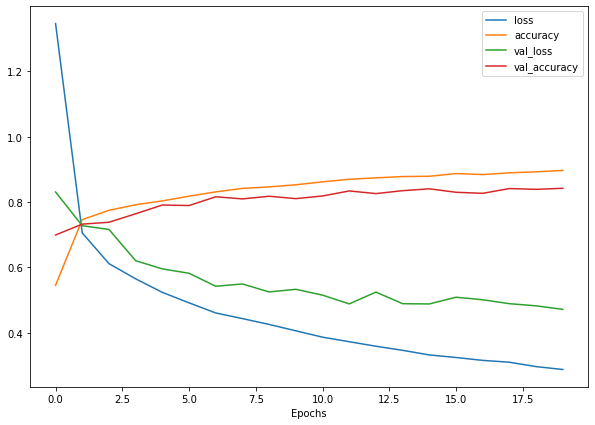

In [22]:
pd.DataFrame(history_1.history).plot(xlabel='Epochs',figsize=(10, 7)) 

# Etapa 6: Avaliação do modelo

In [23]:
fashion_test_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103.0,87.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,0,0,0,0,0,0,0,0,...,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0,0,0,0,0,0,14,53,99,...,0.0,0.0,0.0,0.0,63.0,53.0,31.0,0.0,0.0,0.0
3,2,0,0,0,0,0,0,0,0,0,...,137.0,126.0,140.0,0.0,133.0,224.0,222.0,56.0,0.0,0.0
4,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6135,2,0,0,0,0,0,0,0,1,0,...,1.0,0.0,0.0,146.0,157.0,23.0,0.0,0.0,0.0,0.0
6136,7,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6137,5,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6138,8,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
df_test_sem_na = fashion_test_df.dropna()
df_test_sem_na.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103.0,87.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,0,0,0,0,0,0,0,0,...,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0,0,0,0,0,0,14,53,99,...,0.0,0.0,0.0,0.0,63.0,53.0,31.0,0.0,0.0,0.0
3,2,0,0,0,0,0,0,0,0,0,...,137.0,126.0,140.0,0.0,133.0,224.0,222.0,56.0,0.0,0.0
4,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2,0,0,0,0,0,44,105,44,10,...,105.0,64.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,8,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,6,0,0,0,0,0,0,0,1,0,...,174.0,136.0,155.0,31.0,0.0,1.0,0.0,0.0,0.0,0.0
8,5,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0,0,0,0,0,0,0,0,0,0,...,57.0,70.0,28.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0


In [25]:
df_test_x = df_test_sem_na.drop("label",axis=1)
df_test_x = df_test_x/255.
y_real = df_test_sem_na["label"]

In [26]:
model_1.evaluate(X_test,y_test)

39/39 [==============================] - 0s 4ms/step - loss: 0.4719 - accuracy: 0.8424


[0.4719158411026001, 0.8424045443534851]

In [27]:
df_test_x = df_test_x.values.reshape(df_test_x.shape[0], *(28,28,1))
pred = model_1.predict(df_test_x)

192/192 [==============================] - 1s 3ms/step


In [28]:
predict = pred.argmax(1)
predict

array([0, 1, 6, ..., 7, 5, 8])

In [29]:
from sklearn.metrics import confusion_matrix


confusion_matrix(y_real, predict)

array([[495,   2,   9,  27,   3,   2,  47,   0,  10,   0],
       [  1, 587,   2,   6,   2,   0,   4,   0,   0,   0],
       [  6,   1, 478,   8,  57,   0,  35,   0,  16,   0],
       [ 19,  13,   9, 539,  29,   0,  16,   0,   1,   0],
       [  2,   4,  61,  13, 499,   0,  43,   1,   1,   0],
       [  0,   0,   0,   0,   0, 567,   0,  24,   0,   8],
       [127,   3,  73,  22,  60,   0, 343,   0,  13,   0],
       [  0,   0,   0,   0,   0,  10,   0, 573,   0,  21],
       [  2,   2,   4,   1,   0,   6,   6,   2, 598,   1],
       [  0,   0,   0,   0,   0,   5,   0,  39,   0, 581]])

In [30]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.
  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.
  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.
  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")
  

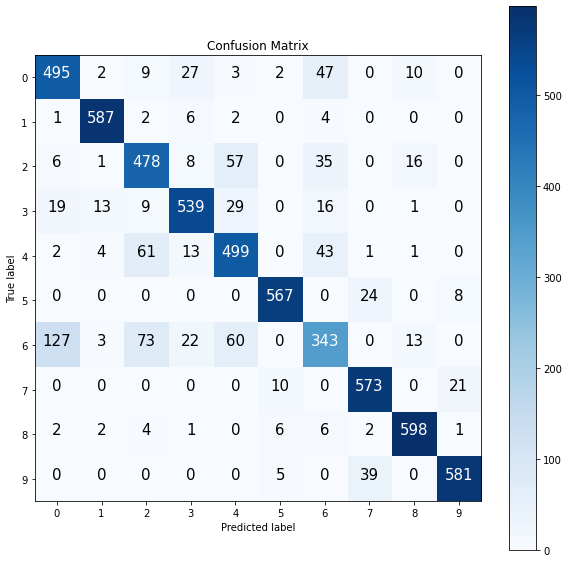

In [31]:
make_confusion_matrix(y_true= y_real, y_pred=predict)

In [32]:
from sklearn.metrics import classification_report

print(classification_report(y_real, predict))

              precision    recall  f1-score   support

           0       0.76      0.83      0.79       595
           1       0.96      0.98      0.97       602
           2       0.75      0.80      0.77       601
           3       0.88      0.86      0.87       626
           4       0.77      0.80      0.78       624
           5       0.96      0.95      0.95       599
           6       0.69      0.54      0.60       641
           7       0.90      0.95      0.92       604
           8       0.94      0.96      0.95       622
           9       0.95      0.93      0.94       625

    accuracy                           0.86      6139
   macro avg       0.86      0.86      0.86      6139
weighted avg       0.85      0.86      0.85      6139

